In [11]:
import autosklearn.regression
from joblib import dump
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, spearmanr
import sklearn
from skmisc.loess import loess
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import r2_score
import sys
sys.path.insert(0,'..')
from ml import *
import pandas as pd

### Preprocess data into right format for cider

In [2]:
feats = pd.read_csv('/data/togo_anon/feats/survey_combos/survey2018_cdr2018.csv')
feats = feats[[c for c in feats.columns if 'reporting' not in c or  c == 'reporting__number_of_records']]\
    .drop(['_c0', 'canton'], axis=1)\
    .rename({'phone_number':'name'}, axis=1)
feats.to_csv('/data/togo_anon/feats/survey_combos/survey2018_cdr2018_cider.csv', index=False)

In [3]:
labels = pd.read_csv('/data/togo_anon/paper/datasets/survey2018.csv')
labels = labels[['phone_number', 'weight', 'cons']]\
    .rename({'phone_number':'name', 'cons':'label'}, axis=1)
labels.to_csv('/data/togo_anon/surveys/survey2018/survey2018_labels_cider.csv', index=False)

In [10]:
feats = pd.read_csv('/data/togo_anon/feats/survey_combos/surveysep2020_cdr2020.csv')
feats = feats[[c for c in feats.columns if 'reporting' not in c or  c == 'reporting__number_of_records']]\
    .rename({'phone_number':'name'}, axis=1)
feats.to_csv('/data/togo_anon/feats/survey_combos/survey2020_cdr2020_cider.csv', index=False)

In [12]:
labels = pd.read_csv('/data/togo_anon/paper/datasets/survey2020.csv')
labels = labels[['phone_number', 'weight', 'pmt']]\
    .rename({'phone_number':'name', 'pmt':'label'}, axis=1)
labels.to_csv('/data/togo_anon/surveys/survey2018/survey2020_labels_cider.csv', index=False)

### Standard ML

In [2]:
learner = Learner(cfg_dir='../configs/config_emily.yml')
learner.merge()

Number of observations with features: 9421 (9421 unique)
Number of observations with labels: 8915 (8821 unique)
Number of matched observations: 8915 (8821 unique)


In [3]:
learner.tuned_model(model_name='gradientboosting')

{'train_r2': '0.24 (0.01)',
 'test_r2': '0.10 (0.00)',
 'train_rmse': '0.56 (-0.01)',
 'test_rmse': '0.61 (-0.06)'}

In [4]:
oos = learner.oos_predictions(model='gradientboosting', tuned=True)

In [5]:
print('r2 score for gradient boosting: %.2f' % 
      r2_score(oos['true'], oos['predicted'], sample_weight=oos['weight']))

r2 score for gradient boosting: 0.13


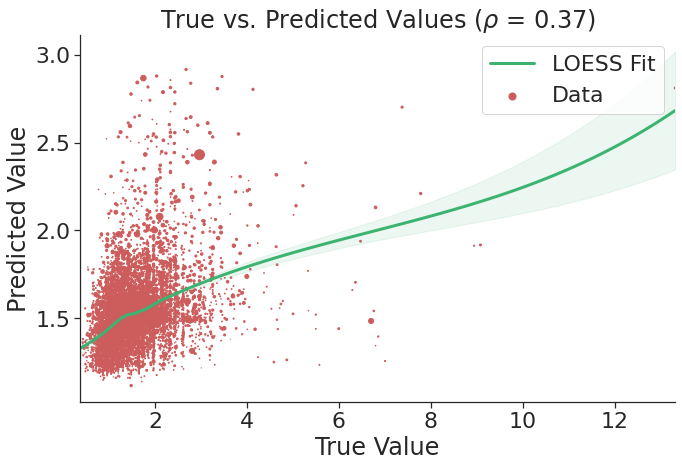

In [6]:
learner.scatter_plot(model_name='gradientboosting', tuned=True)

### AutoML

In [7]:
learner.automl(model_name='automl')

/home/em/.conda/envs/cider/lib/python3.7/site-packages/distributed/node.py:164: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 34819 instead
  expected, actual


Finished automl training!


In [13]:
oos = learner.oos_predictions(model='automl', tuned=False)

In [14]:
print('R2 score for AutoML %.2f' % r2_score(oos['true'], oos['predicted'], sample_weight=oos['weight']))

R2 score for AutoML 0.13


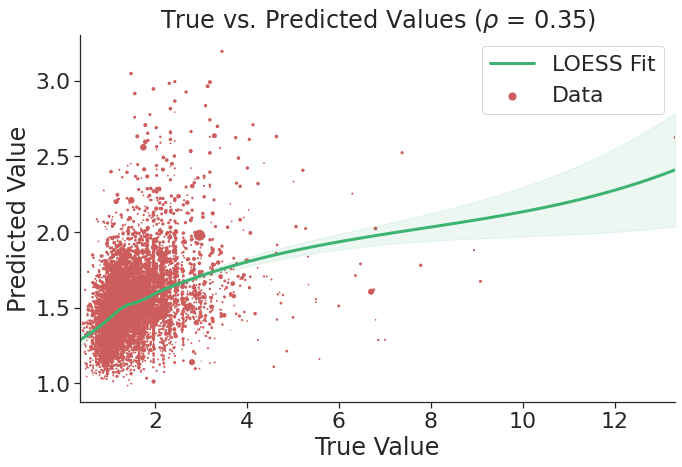

In [15]:
learner.scatter_plot(model_name='automl', tuned=False)